In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize as optimize

In [2]:
def yld2000(sigma_x, sigma_y, alpha, a):
    (alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8) = alpha
    phi1 = abs(((2*alpha1+alpha2)/3)*sigma_x - ((2*alpha2+alpha1)/3)*sigma_y)**a
    phi2 = abs(((2*alpha3-2*alpha4)/3)*sigma_x + ((4*alpha4-alpha3)/3)*sigma_y)**a + abs(((4*alpha5-alpha6)/3)*sigma_x + ((2*alpha6-2*alpha5)/3)*sigma_y)**a
    
    return ((phi1+phi2)/2)**(1/a)

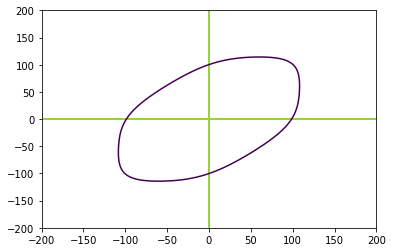

In [3]:
alpha = np.array([0.9349, 1.0671, 0.9690, 0.9861, 1.0452, 0.9999, 0.9097, 1.0805])

rho = 1
phi = np.linspace(0, 2 * np.pi, 100)
sxx = np.linspace(-200,200,500)
syy = np.linspace(-200,200,500)
sx, sy = np.meshgrid(sxx, syy)
ys = 100
a = 5.9992

points = 500

sigma_eff = []
for i in range(points):
    temp = []
    for j in range(points):
        temp.append(yld2000(sx[i,j], sy[i,j], alpha, a))
    sigma_eff.append(temp)

sigma_eff = np.array(sigma_eff)

random_x = np.linspace(-200,200,points)
random_z = np.linspace(-200,200,points)
xx, zz = np.meshgrid(random_x, random_z)
plt.contour(xx, np.zeros(points**2).reshape(xx.shape), zz)

random_y = np.linspace(-200,200,points)
yy, zz = np.meshgrid(random_y, random_z)
plt.contour(np.zeros(points**2).reshape(xx.shape), yy, zz)

plt.contour(sx,sy,sigma_eff-ys,levels=[1])

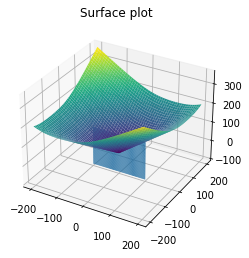

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = z = np.linspace(-100,100,100)
X, Z = np.meshgrid(x, z)
ys = np.array(np.ones(10000))
Y = ys.reshape(X.shape)

ax.plot_surface(X, Y, Z)
ax.plot_surface(sx, sy, sigma_eff,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()